# **KNN on Shuttle Data**

In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("shuttle.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,108.0,3.0,109.0,0.0,72.0,7.0,1.0,36.0,36.0,o
1,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
2,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
3,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
4,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o


In [3]:
df.rename(columns = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'TV'}, inplace = True)
df.head()

,A,B,C,D,E,F,G,H,I,TV
0,108.0,3.0,109.0,0.0,72.0,7.0,1.0,36.0,36.0,o
1,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
2,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
3,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
4,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o


In [4]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'TV'], dtype='object')

In [5]:
X = df[['A','B','C','D','E','F','G','H','I']].values.astype(float)
X[0:5]

array([[108.,   3., 109.,   0.,  72.,   7.,   1.,  36.,  36.],
       [ 81.,   0.,  84.,   0., -14.,  -2.,   4., 100.,  96.],
       [ 81.,   0.,  84.,   0., -20.,  16.,   4., 105., 102.],
       [ 76.,  -1.,  81.,   0., -42.,  -3.,   5., 125., 120.],
       [105.,   0., 107.,   2.,  70.,   0.,   1.,  37.,  36.]])

In [6]:
y = df['TV'].values
y[0:5]

array(['o', 'o', 'o', 'o', 'o'], dtype=object)

## Preprocessing

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 7.22292697e+00,  8.39601067e-02,  2.76780064e+00,
        -7.48433629e-03,  2.09700256e+00,  2.65343969e-02,
        -3.56177703e+00, -5.97012096e-01,  1.97925322e+00],
       [ 4.13837948e+00,  1.61137132e-02, -9.55332010e-02,
        -7.48433629e-03, -3.31100839e+00, -2.41651309e-02,
        -3.28828740e+00,  3.15615103e+00,  5.97772949e+00],
       [ 4.13837948e+00,  1.61137132e-02, -9.55332010e-02,
        -7.48433629e-03, -3.68831148e+00,  7.72339247e-02,
        -3.28828740e+00,  3.44936690e+00,  6.37757712e+00],
       [ 3.56716698e+00, -6.50175136e-03, -4.39133262e-01,
        -7.48433629e-03, -5.07175614e+00, -2.97984118e-02,
        -3.19712419e+00,  4.62223037e+00,  7.57712000e+00],
       [ 6.88019947e+00,  1.61137132e-02,  2.53873393e+00,
         4.61108246e-02,  1.97123487e+00, -1.28985692e-02,
        -3.56177703e+00, -5.38368922e-01,  1.97925322e+00]])

## Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (37171, 9) (37171,)
Test Set:  (9293, 9) (9293,)


## Classification
#### KNN algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

In [11]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

#### Predicting

In [12]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array(['n', 'n', 'n', 'n', 'n'], dtype=object)

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat))

[[9106    1]
 [   0  186]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           n       1.00      1.00      1.00      9107
           o       0.99      1.00      1.00       186

    accuracy                           1.00      9293
   macro avg       1.00      1.00      1.00      9293
weighted avg       1.00      1.00      1.00      9293



## Trying different K values

In [15]:
error_rate = []
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    accuracy.append((1-np.mean(pred_i != y_test))*100)
    
print(error_rate)

[0.00010760787689658883, 0.00021521575379317766, 0.00021521575379317766, 0.0003228236306897665, 0.0003228236306897665, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0004304315075863553, 0.0005380393844829441, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.000645647261379533, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441, 0.0005380393844829441]


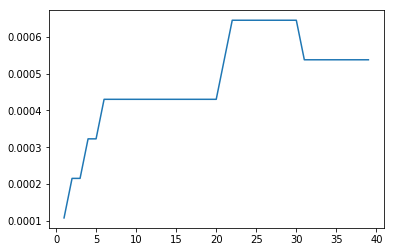

In [18]:
lol = sns.lineplot(range(1,40), error_rate, markers = True, dashes = False)

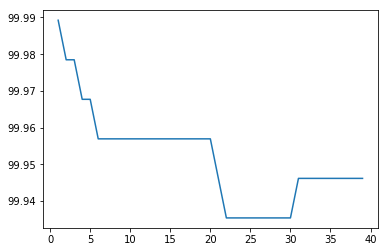

In [16]:
lmao = sns.lineplot(range(1,40), accuracy, markers = True, dashes = False)